# CMIP6 Arctic Case Study : Compute the aerosol-cloud interaction effective radiative forcing

## What this notebook holds 

This notebook aims at showing the effective radiative forcing that is caused by the aerosol burdens' levels of 2014.

**WRITE ABOUT THE APRP METHOD !!!!**

### The use of CMIP6 data

We use two experiments realized during the CMIP6  : **piClim-control** and **piClim-aer**. These are both atmosphere-only climate model simulations in which sea surface temperatures (SSTs) and sea icea concentrations (SICs) are fixed at model-specific preindustrial climatological values. The description of the experiments can be found here : https://wcrp-cmip.github.io/CMIP6_CVs/docs/CMIP6_experiment_id.html. On the one hand, the **piClim-control** realization assumes aerosols burdens set to their preindustrial levels hence why it is dubbed as the control experiment. On the other hand, the **piClim-aer** realization uses present-day, present-day being 2014, aerosols burdens' levels.

The variable used are listed and explicited below according to : https://clipc-services.ceda.ac.uk/dreq/mipVars.html. All the variables are monthly timeseries over 30 years . We use the monthly climatology of each of these variables.

> <span style="color:SkyBlue">**clt**</span>  : Total cloud area fraction (%) for the whole atmospheric column
>
> <span style="color:gold">**rsdt / rldt**</span> : Shortwave / Longwave radiation ($W/m^{2}$) **incident** at the TOA
> 
> <span style="color:orange">**rsut / rlut**</span> : Shortwave / Longwave radiation ($W/m^{2}$) **going out**  at the TOA
>
> <span style="color:orangered">**rsutcs / rlutcs**</span> : Shortwave / Longwave radiation ($W/m^{2}$) **going out**  at TOA for **clear-sky conditions**
> 
> <span style="color:Orchid">**rsds / rlds**</span> : Shortwave / Longwave **downwelling** radiation ($W/m^{2}$) at the surface
> 
> <span style="color:Indigo ">**rsdscs / rldscs**</span>  : Shortwave / Longwave **downwelling** radiation ($W/m^{2}$) at the surface for **clear-sky conditions**
> 
> <span style="color:YellowGreen">**rsus / rlus**</span> : Shortwave / Longwave **upwelling** radiation ($W/m^{2}$) at the surface
>
> <span style="color:Darkgreen">**rsuscs / rluscs**</span>: Shortwave / Longwave **upwelling** radiation ($W/m^{2}$) at the surface for **clear-sky conditions**
>
> **areacella** : For every grid, the latitude-dependent surface associated to each grid point.

### Treatment of the clouds in the atmosphere column :

We divide each grid cell into two distinct areas : the <span style="color:orange">**clear-sky**</span> areas known as <span style="color:orange">$cs$</span> and the cloudy areas known as <span style="color:purple">**overcast**</span> or <span style="color:purple">$oc$</span>. The variables we get from the models' outputs are only the <span style="color:orange">**clear-sky**</span> and the <span style="color:red">**all-sky**</span> variables though. 

For a given all-sky flux <span style="color:red">$R$</span> value taken on a grid point, one can express it as a function of the clt written <span style="color:skyblue">**c**</span>, the clear-sky flux written <span style="color:orange">$R_{cs}$</span> and the overcast flux <span style="color:purple">$R_{oc}$</span>. The total cloud fraction, <span style="color:skyblue">**c**</span>, gives us the proportion of the atmosphere column that can be seen as cloudy from space. In turn the proportion of the atmosphere that knows a clear_sky is $1-$ <span style="color:skyblue">**c**</span>. The expression derived is simply : 

> Equation (1) : $R = cR_{oc} + (1-c)R_{cs}$

Therefore, the <span style="color:purple">$R_{oc}$</span> can be computed as :

> Equation (2) : $R_{oc} = \frac{(R - (1-c)R_{cs})}{c}$

Thus, <span style="color:purple">$R_{oc}$</span> embodies the flux that can be found over cloudy areas. What's more, we make the hypothesis that **the noncloud atmospheric constituents absorb and scatter the same proportion of the radiation stream as they would if clouds were abruptly cleared from the region** (Taylor, K. E. et al. (2007)). This approximation means that, within an unit square meter of overcast atmosphere column, the observed <span style="color:purple">$R_{oc}$</span> flux would be the sum of the clear sky flux, <span style="color:orange">$R_{cs}$</span>, and of the flux coming out of the cloud. We call this flux <span style="color:blue">$R_{cloud}$</span>.

Therefore, by taking the difference between the overcast flux and the clear-sky flux, one could grasp the sole contribution of the clouds on the grid cell. As a result, the cloud contribution to the all-sky flux <span style="color:blue">$R_{cloud}$</span> can be obtained through the following equation :

> Equation (3) : $R_{cloud} = R_{oc} - R_{cs}$

The following figure explicits the decomposition behind our hypothesis :

![title](img/clouds.svg)

In addition, our hypothesis allows us to introduce another decomposition of the all-sky flux :

> $R = cR_{oc} + (1-c)R_{cs}$
> 
> $R = c(R_{oc} - R_{cs}) + R_{cs}$
> 
> Equation (4) : $R = c$<span style="color:blue">$R_{cloud}$</span> + <span style="color:orange">$R_{cs}$</span>

### Computing the variation of a flux between the two experiments 

Having the expression of any all-sky flux in function of the <span style="color:purple">**overcast**</span> and <span style="color:orange">**clear-sky**</span> fluxes, one can derive $\Delta R$, which is the contribution of the 2014 aerosols' content in the atmosphere compared to the pre-industrial concentrations. 

As a reminder, a full-sky flux of one experiment, noted as $exp$, can be expressed as in the following.

> $[R]_{exp} = [c]_{exp}[R_{oc}]_{exp} + (1-[c]_{exp})[R_{cs}]_{exp}$

We may then derive $\Delta R$. Any expression noted with a $\Delta$ is the difference between the $aer$ and the $ctrl$ experiment. Without any approximation, one can find that $\Delta R$ can be written as the differential of R where the fluxes and total cloud fractions are taken as their mean values between the two experiments. Indeed, by giving $c = \frac{[c]_{aer}+[c]_{ctrl}}{2}$, $R_{oc} = \frac{[R_{oc}]_{aer}+[R_{oc}]_{ctrl}}{2}$ and $R_{cs} = \frac{[R_{cs}]_{aer}+[R_{cs}]_{ctrl}}{2}$,  we find the expression written below.

> $\Delta R = R_{aer} - R_{control} $
>
> $\Delta R = [c]_{aer}[R_{oc}]_{aer} + (1-[c]_{aer})[R_{cs}]_{aer}$ - $[R]_{ctrl} = [c]_{ctr}[R_{oc}]_{ctrl} + (1-[c]_{ctrl})[R_{cs}]_{ctrl}$
>
> $\Delta R =$ <span style="color:orange">$\Delta R_{cs}$</span> + <span style="color:SkyBlue">$\Delta c (R_{oc} - R_{cs})$</span> + <span style="color:SteelBlue">$c (\Delta R_{oc} - \Delta R_{cs})$</span>

From this equation, we get three different effects of changing the aerosols' burdens on the all-sky flux.

> $\Delta R_{cs}$ : the variation in R due to <span style="color:orange">**the effect of aerosols in the absence of clouds**</span>
> 
> <span style="color:SkyBlue">$\Delta c (R_{oc} - R_{cs})$</span> : the mean change in R caused by <span style="color:SkyBlue">**the variation of the total cloud-cover**</span>
> 
> <span style="color:SteelBlue">$c (\Delta R_{oc} - \Delta R_{cs})$</span> : the mean contribution in R of <span style="color:SteelBlue">**the variation in the clouds' flux for a mean cloud coverage**</span>

The two final terms sum up the **cloud contribution** in the difference between the aerosol and control experiments. However, as noted in Taylor, K. E. et al. (2007), these two effects cannot be considered as the cloud feedback. Actually, even if the clouds variables $c$ and $R_{oc}$ do not vary making $\Delta c$ and $\Delta R_{oc}$ zero, a sole variation in the clear-sky direct effect will make the final term non-zero.

### APRP METHOD FOR THE SW


Done by Lucas Giboni,

Reference :

Taylor, K. E. et al. (2007), Estimating shortwave radiative forcing and response in 
    climate models, J. Clim., 20(11), 2530-2543, doi:10.1175/JCLI4143.1.

## Importations

In [1]:
### LOAD AND NAVIGATE THROUGH THE DATA ###

import os  # to get access to commands related to path setting and creation of directories

### DATA OBJECTS AND ASSOCIATED COMPUTATION ###

import numpy as np  # to handle numpy arrays and the associated tools

import xarray as xr  # to manage the data

import xcdat as xc  # to handle climate model outputs with xarray

### REPRESENTING DATA ###

import matplotlib.pyplot as plt  # to handle plotting routines

import cartopy.crs as ccrs  # to handle map projections

### HOMEMADE LIBRARIES ###

from utilities.prepare_data.extract_climatologies import (
    create_climatology_dict,
    get_model_entries__only_from_clim,
    add_one_variable_to_dataset,
)  # function to create the climatology dictionnary from the raw data

from utilities.aprp_library.code.aprp import APRP  # APRP routine

from utilities.store_data.save_and_load_data import (
    netcdf_to_dict,
)  # to load the climatology dictionnary

## Define the paths for saving and loading data

In [2]:
#######################
#### INITIALISATION ###
#######################

# ================ DEFINE THE FOLDERS WHERE IS STORED THE DATA ================ #

### DEFINE THE HOME DIRECTORY ###

## Home directory ##

homedir_path = os.path.expanduser("~")

### DEFINE WHERE IS THE DOWNLOADED RAW DATA ###

## Parent directory of the download folder ##

parent_path_download = homedir_path + "/certainty-data"

## Name of the download folder ##

download_folder_name = "CMIP6-DATA"

### DEFINE WHERE TO SAVE THE CLIMATOLOGIES ###

## Path of the save directory ##

parent_path_save_clim = (
    homedir_path + "/certainty-data/" + download_folder_name + "/climatologies"
)

## Generate the CMIP6 climatology

In [3]:
##################################
### GENERATE CMIP6 CLIMATOLOGY ###
##################################
"""
create_climatology_dict(data_path = parent_path_download, data_folder_name = download_folder_name,
                        save_path = parent_path_save_clim)
"""

'\ncreate_climatology_dict(data_path = parent_path_download, data_folder_name = download_folder_name, \n                        save_path = parent_path_save_clim)\n'

## Load the CMIP6 climatology

In [4]:
##################################
### LOAD THE CMIP6 CLIMATOLOGY ###
##################################

data_cmip6_clim = netcdf_to_dict(save_path=parent_path_save_clim)

## APRP METHOD

In [6]:
clim_keys = list(data_cmip6_clim.keys())

clim_keys_without_exp = [
    get_model_entries__only_from_clim(key_with_exp) for key_with_exp in clim_keys
]


# np.unique(clim_keys_without_exp) + ".piClim-control"

# np.unique(clim_keys_without_exp) + ".piClim-aer"

In [7]:
dict_aprp = {}

for key in clim_keys_without_exp:

    key_control = key + ".piClim-control"

    key_aer = key + ".piClim-aer"

    output = APRP(data_cmip6_clim[key_control], data_cmip6_clim[key_aer])

    dict_aprp[key] = output

# add units to lat when building the dataset

2025-04-23 14:10:12,317 [WARNING]: bounds.py(create_bounds:987) >> The 'lat' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2025-04-23 14:10:12,317 [WARNING]: bounds.py(create_bounds:987) >> The 'lat' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2025-04-23 14:10:12,782 [WARNING]: bounds.py(create_bounds:987) >> The 'lat' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2025-04-23 14:10:12,782 [WARNING]: bounds.py(create_bounds:987) >> The 'lat' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2025-04-23 14:10:14,710 [WARNING]: bounds.py(create_bounds:987) >> The 'lat' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2025-04-23 14:10:14,710 [WARNING]: bounds.py(create_bounds:987) >> The 'lat' coordinate variable is missing a 'units' attribute. Assuming 'units' is 'degrees_north'.
2025

In [8]:
dict_aprp[clim_keys_without_exp[0]]

<xarray.Dataset> Size: 9MB
Dimensions:       (time: 12, lat: 64, lon: 128, bnds: 2)
Coordinates:
  * time          (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lat           (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon           (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables: (12/15)
    sfc_alb       (time, lat, lon) float64 786kB -0.07613 -0.08655 ... 0.0 0.0
    sfc_alb_clr   (time, lat, lon) float64 786kB -0.01681 -0.0172 ... 0.0 0.0
    sfc_alb_oc    (time, lat, lon) float64 786kB -0.05932 -0.06935 ... 0.0 0.0
    cld           (time, lat, lon) float64 786kB -0.2401 -0.2207 ... 0.0 0.0
    cld_amt       (time, lat, lon) float64 786kB -0.1714 -0.154 ... 0.0 0.0
    cld_scat      (time, lat, lon) float64 786kB -0.1094 -0.1387 ... 0.0 0.0
    ...            ...
    noncld_abs    (time, lat, lon) float64 786kB 0.3672 0.3726 0.372 ... 0.0 0.0
    sfc_alb_ghan  (time, lat, lon) float64 786kB -0.04135 -0.04203 ... 0.0 0.0
    cld_ghan      (time, lat, lon) float64 786kB -0.2748 -0.2653 ... 0.0 0.0
    lon_bnds      (lon, bnds) float64 2kB -1.406 1.406 1.406 ... 355.8 358.6
    lat_bnds      (lat, bnds) float64 1kB -89.25 -86.48 -86.48 ... 86.48 89.25
    time_bnds     (time, bnds) object 192B 0001-01-01 00:00:00 ... 0002-01-01...

when to regrid ????

## REGRIDDING

create output grid

In [9]:
import numpy.typing as npt


def get_step(coordinate_array: npt.NDArray[np.float64]) -> float:
    """ """

    return np.max(np.diff(coordinate_array))

In [10]:
list_steps_lat = [get_step(dict_aprp[key].lat.values) for key in clim_keys_without_exp]

list_steps_lon = [get_step(dict_aprp[key].lon.values) for key in clim_keys_without_exp]

In [ ]:
max_step_lon = np.max(list_steps_lon)

max_step_lat = np.max(list_steps_lat)

np.float64(88.6046930891805)

to have a regular grid 

In [21]:
from math import floor

n_steps_lon = floor(360 / max_step_lon)  # bc we want a step greater than max_step_lat

new_step_lon = 360 / n_steps_lon

In [22]:
n_steps_lat = floor(180 / max_step_lat)  # bc we want a step greater than max_step_lat

new_step_lat = 180 / n_steps_lat

In [23]:
(90 - new_step_lat / 2) - (-90 + new_step_lat / 2)

177.1875

In [24]:
lat_axis = xc.create_axis(
    "lat", np.arange(-90 + new_step_lat / 2, 90 + new_step_lat / 2, new_step_lat)
)

# since we have peaked the step such that the latitude range is divded into an integer number of intervals we may center its bounds on -90 / 90.

lon_axis = xc.create_axis("lon", np.arange(0, 360, new_step_lon))

output_grid = xc.create_grid(x=lon_axis, y=lat_axis)

If performing conservative regridding from a high/medium resolution lat/lon grid to a coarse lat/lon target, Regrid2 may provide better results as it assumes grid cells with constant latitudes and longitudes while xESMF assumes the cells are connected by Great Circles : https://xcdat.readthedocs.io/en/latest/generated/xarray.Dataset.regridder.horizontal.html


BASE ARRAY NO VALUE AT THE POLES ??? 

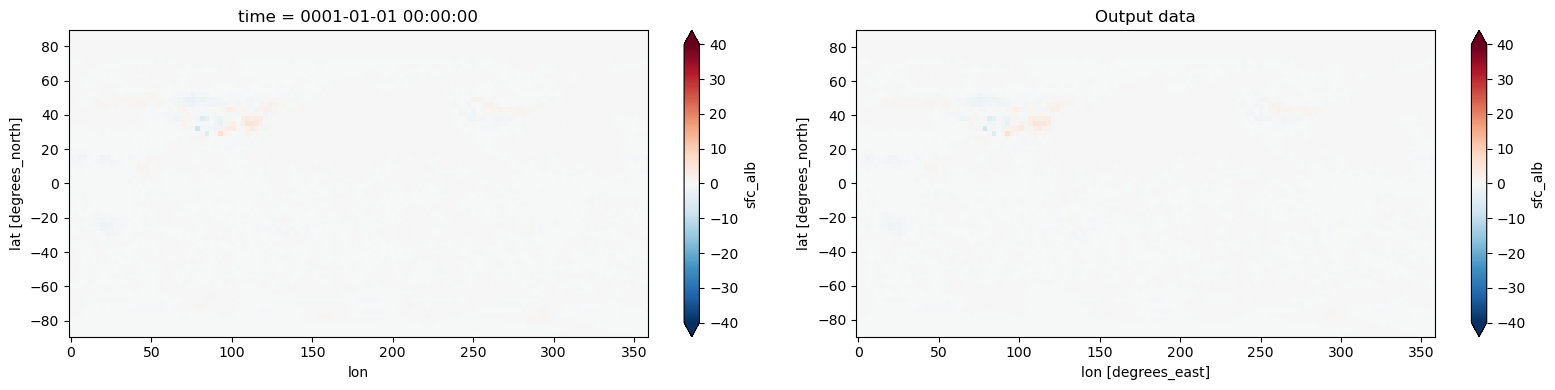

In [26]:
output = ds.regridder.horizontal("sfc_alb", output_grid, tool="regrid2")

fig, axes = plt.subplots(ncols=2, figsize=(16, 4))

ds.sfc_alb.isel(time=0).plot(
    ax=axes[0], vmin=-40, vmax=40, extend="both", cmap="RdBu_r"
)

output.sfc_alb.isel(time=0).plot(
    ax=axes[1], vmin=-40, vmax=40, extend="both", cmap="RdBu_r"
)
axes[1].set_title("Output data")

plt.tight_layout()

In [27]:
ds

<xarray.Dataset> Size: 9MB
Dimensions:       (time: 12, lat: 64, lon: 128, bnds: 2)
Coordinates:
  * time          (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lat           (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon           (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables: (12/15)
    sfc_alb       (time, lat, lon) float64 786kB -0.07613 -0.08655 ... 0.0 0.0
    sfc_alb_clr   (time, lat, lon) float64 786kB -0.01681 -0.0172 ... 0.0 0.0
    sfc_alb_oc    (time, lat, lon) float64 786kB -0.05932 -0.06935 ... 0.0 0.0
    cld           (time, lat, lon) float64 786kB -0.2401 -0.2207 ... 0.0 0.0
    cld_amt       (time, lat, lon) float64 786kB -0.1714 -0.154 ... 0.0 0.0
    cld_scat      (time, lat, lon) float64 786kB -0.1094 -0.1387 ... 0.0 0.0
    ...            ...
    noncld_abs    (time, lat, lon) float64 786kB 0.3672 0.3726 0.372 ... 0.0 0.0
    sfc_alb_ghan  (time, lat, lon) float64 786kB -0.04135 -0.04203 ... 0.0 0.0
    cld_ghan      (time, lat, lon) float64 786kB -0.2748 -0.2653 ... 0.0 0.0
    lon_bnds      (lon, bnds) float64 2kB -1.406 1.406 1.406 ... 355.8 358.6
    lat_bnds      (lat, bnds) float64 1kB -89.25 -86.48 -86.48 ... 86.48 89.25
    time_bnds     (time, bnds) object 192B 0001-01-01 00:00:00 ... 0002-01-01...

In [28]:
max_step_lat

np.float64(2.790613821638995)

extraire une même variable, regrid toute la variable et combiner sur le nb de modèles.


In [31]:
def regrid_field(ds, field: str):
    """ """

    field_regridded = ds.regridder.horizontal(field, output_grid, tool="regrid2")

    return field_regridded

In [65]:
keys_aprp = dict_aprp.keys()


fields = [
    "cld",
    "sfc_alb",
    "noncld",
    "noncld_scat",
    "noncld_abs",
    "cld_amt",
    "cld_scat",
    "cld_abs",
]

# initialize

field = "cld"

dict_aprp_regridded_full = {
    key: dict_aprp[key].regridder.horizontal(field, output_grid, tool="regrid2")
    for key in keys_aprp
}


for field in fields[1:]:

    # generate the dictionnary of all models for one field

    dict_aprp_regridded_given_field = {
        key: dict_aprp[key].regridder.horizontal(field, output_grid, tool="regrid2")
        for key in keys_aprp
    }

    # add this one field to the full dictionnary

    dict_aprp_regridded_full = {
        key: add_one_variable_to_dataset(
            variable_name=field,
            var_datarray=dict_aprp_regridded_given_field[key],
            modify_data=True,
            dataset=dict_aprp_regridded_full[key],
            do_clim=False,
        )
        for key in keys_aprp
    }

In [62]:
keys_aprp

dict_keys(['BCC-ESM1.r1i1p1f1', 'UKESM1-0-LL.r1i1p1f4', 'CanESM5.r1i1p2f1', 'CNRM-CM6-1.r1i1p1f2', 'CNRM-ESM2-1.r1i1p1f2', 'ACCESS-ESM1-5.r1i1p1f1', 'EC-Earth3.r1i1p1f1', 'MPI-ESM-1-2-HAM.r1i1p1f1', 'IPSL-CM6A-LR.r1i1p1f1', 'IPSL-CM6A-LR-INCA.r1i1p1f1', 'MIROC6.r1i1p1f1', 'MRI-ESM2-0.r1i1p1f1', 'GISS-E2-1-G.r1i1p1f1', 'CESM2.r1i1p1f1', 'NorESM2-LM.r1i1p1f1', 'NorESM2-MM.r1i1p1f1', 'GFDL-CM4.r1i1p1f1'])

In [66]:
keys_aprp = [
    "BCC-ESM1.r1i1p1f1",
    "UKESM1-0-LL.r1i1p1f4",
    "CanESM5.r1i1p2f1",
    "CNRM-CM6-1.r1i1p1f2",
    "CNRM-ESM2-1.r1i1p1f2",
    "ACCESS-ESM1-5.r1i1p1f1",
    "MPI-ESM-1-2-HAM.r1i1p1f1",
    "IPSL-CM6A-LR.r1i1p1f1",
    "IPSL-CM6A-LR-INCA.r1i1p1f1",
    "MIROC6.r1i1p1f1",
    "MRI-ESM2-0.r1i1p1f1",
    "GISS-E2-1-G.r1i1p1f1",
    "CESM2.r1i1p1f1",
    "NorESM2-LM.r1i1p1f1",
    "NorESM2-MM.r1i1p1f1",
    "GFDL-CM4.r1i1p1f1",
]

In [67]:
# needed for the concat function to work

dict_aprp_regridded_full = {
    key: dict_aprp_regridded_full[key]
    .groupby(dict_aprp_regridded_full[key].time.dt.month)
    .mean()
    for key in keys_aprp
}

In [68]:
# let's make the entry average

ensemble_aprp_avg = xr.concat(dict_aprp_regridded_full.values(), "entry").mean(
    dim="entry"
)

## PLOT MAP OF APRP COMPONENTS

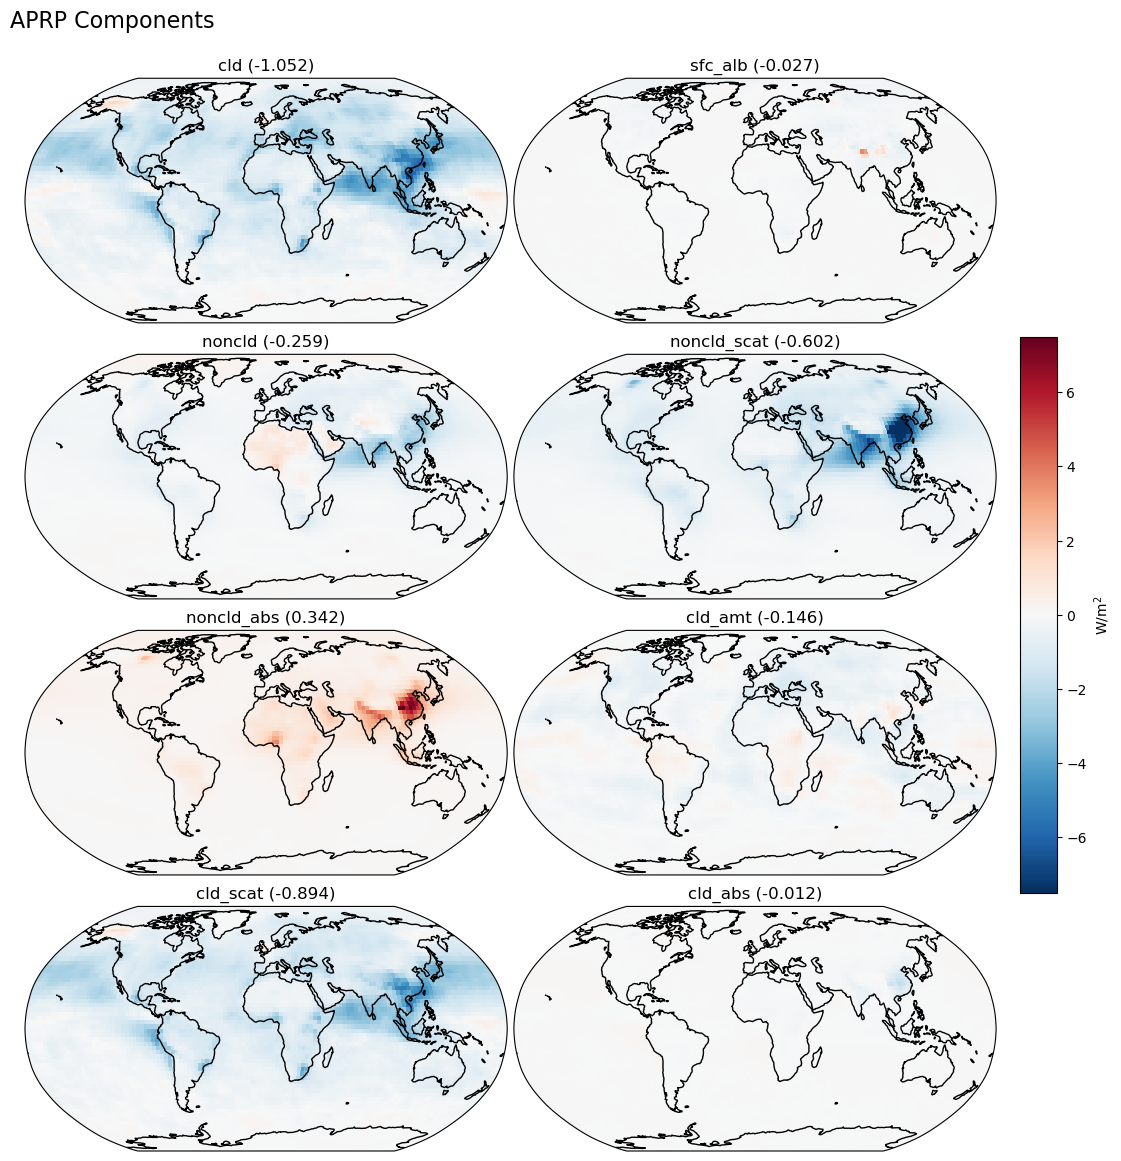

In [69]:
output = ensemble_aprp_avg

fields = [
    "cld",
    "sfc_alb",
    "noncld",
    "noncld_scat",
    "noncld_abs",
    "cld_amt",
    "cld_scat",
    "cld_abs",
]

fig = plt.figure(figsize=(12, 12))
plt.suptitle("APRP Components", fontsize=16, x=0, ha="left")
axes = fig.subplots(nrows=4, ncols=2, subplot_kw={"projection": ccrs.Robinson()})
cnt = -1
for row in range(4):
    for col in range(2):
        cnt += 1
        var = fields[cnt]
        avgmap = output.mean("month")
        avg = avgmap.spatial.average(var, axis=["X", "Y"])[var].values
        pl = avgmap[var].plot(
            ax=axes[row, col],
            transform=ccrs.PlateCarree(),
            vmin=-7.5,
            vmax=7.5,
            cmap="RdBu_r",
            add_colorbar=False,
        )
        axes[row, col].set_title(var + " (" + str(np.round(avg, 3)) + ")")
        axes[row, col].coastlines()

plt.tight_layout(w_pad=2.5, h_pad=-2)

fig.colorbar(
    pl, ax=axes.ravel().tolist(), pad=0.02, shrink=0.5, aspect=15, label="W/m$^2$"
)